In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_regression


In [3]:
df = pd.read_csv("Life Expectancy Data.csv")


In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

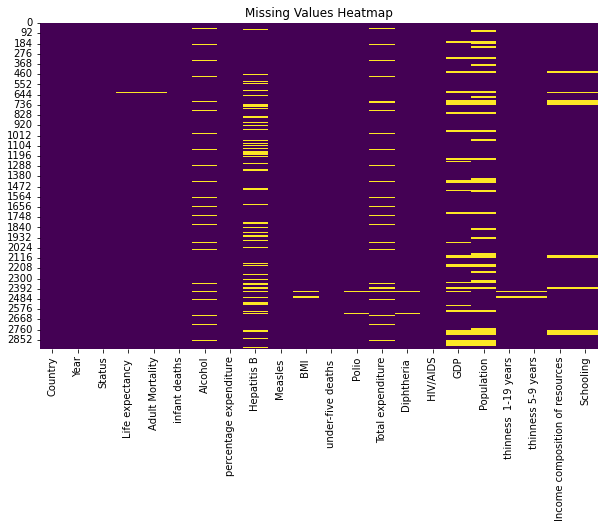

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [6]:
df.drop(['Country', 'Status'], axis=1, inplace=True)


In [7]:
df.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
# Let us drop duplicate values
df=df.drop_duplicates()

In [10]:
# Step 6: Fill missing values with mean for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.median()))

In [11]:
df.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [12]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df.drop('Life expectancy ', axis=1))


In [13]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
selector = SelectKBest(score_func=mutual_info_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [15]:
selected_features = X_train.columns[selector.get_support()]
print(selected_features)


Index(['Adult Mortality', 'infant deaths', 'Alcohol', ' BMI ',
       'under-five deaths ', ' HIV/AIDS', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [16]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)


In [17]:
pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('selector', SelectKBest(score_func=mutual_info_regression, k=10)),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


In [18]:
pipe

Pipeline(steps=[('scaler', RobustScaler()),
                ('selector',
                 SelectKBest(score_func=<function mutual_info_regression at 0x000001DA64A7C790>)),
                ('knn', KNeighborsRegressor())])

In [19]:
y_pred

array([73.44, 74.86, 75.62, 76.1 , 50.72, 57.08, 68.16, 73.58, 77.9 ,
       55.34, 53.  , 54.88, 51.72, 75.86, 68.44, 62.86, 58.44, 79.06,
       72.4 , 80.32, 78.8 , 83.5 , 73.66, 68.04, 71.1 , 72.1 , 55.1 ,
       65.54, 81.98, 73.34, 67.  , 73.64, 73.04, 71.9 , 78.5 , 51.34,
       60.7 , 72.4 , 63.62, 70.6 , 55.  , 60.72, 75.58, 81.74, 76.24,
       56.88, 81.44, 75.86, 62.32, 69.48, 53.34, 73.14, 81.44, 80.48,
       74.8 , 55.18, 75.02, 74.26, 67.16, 71.92, 78.62, 55.04, 74.5 ,
       73.18, 56.34, 47.16, 53.48, 75.32, 65.4 , 72.14, 83.96, 78.28,
       73.56, 50.5 , 59.94, 68.34, 64.36, 75.5 , 57.76, 68.48, 63.56,
       61.52, 64.02, 68.32, 68.56, 78.92, 70.82, 67.04, 74.08, 82.98,
       73.06, 54.34, 72.82, 80.98, 75.76, 70.58, 81.12, 70.96, 65.84,
       62.46, 82.58, 54.98, 65.4 , 56.34, 75.98, 80.84, 68.74, 70.2 ,
       60.72, 61.12, 65.16, 60.72, 53.92, 66.24, 64.34, 77.5 , 53.78,
       55.9 , 57.94, 64.36, 65.24, 70.78, 81.72, 58.1 , 61.28, 66.4 ,
       73.24, 59.54,

In [20]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))


MAE: 1.554455782312925
MSE: 5.412479591836734
RMSE: 2.3264736387581815
R2: 0.9375488158340654


In [21]:
import pickle

# Save the pipeline
with open('knn_life_expectancy_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)


In [22]:
with open('knn_life_expectancy_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Predict
new_prediction = loaded_model.predict(X_test)


In [23]:
new_prediction

array([73.44, 74.86, 75.62, 76.1 , 50.72, 57.08, 68.16, 73.58, 77.9 ,
       55.34, 53.  , 54.88, 51.72, 75.86, 68.44, 62.86, 58.44, 79.06,
       72.4 , 80.32, 78.8 , 83.5 , 73.66, 68.04, 71.1 , 72.1 , 55.1 ,
       65.54, 81.98, 73.34, 67.  , 73.64, 73.04, 71.9 , 78.5 , 51.34,
       60.7 , 72.4 , 63.62, 70.6 , 55.  , 60.72, 75.58, 81.74, 76.24,
       56.88, 81.44, 75.86, 62.32, 69.48, 53.34, 73.14, 81.44, 80.48,
       74.8 , 55.18, 75.02, 74.26, 67.16, 71.92, 78.62, 55.04, 74.5 ,
       73.18, 56.34, 47.16, 53.48, 75.32, 65.4 , 72.14, 83.96, 78.28,
       73.56, 50.5 , 59.94, 68.34, 64.36, 75.5 , 57.76, 68.48, 63.56,
       61.52, 64.02, 68.32, 68.56, 78.92, 70.82, 67.04, 74.08, 82.98,
       73.06, 54.34, 72.82, 80.98, 75.76, 70.58, 81.12, 70.96, 65.84,
       62.46, 82.58, 54.98, 65.4 , 56.34, 75.98, 80.84, 68.74, 70.2 ,
       60.72, 61.12, 65.16, 60.72, 53.92, 66.24, 64.34, 77.5 , 53.78,
       55.9 , 57.94, 64.36, 65.24, 70.78, 81.72, 58.1 , 61.28, 66.4 ,
       73.24, 59.54,